In [1]:
%pylab inline
import netCDF4
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle


root = r'D:\Documents\GIT_checkouts\aeolis-models\sandmotor'

# load colormap
fp = open('cmap.pkl', 'rb')
shore_map = pickle.load(fp)
fp.close()


Populating the interactive namespace from numpy and matplotlib


In [72]:
def create_plot(par, data):
    
    # remove inf's
    ix = np.isinf(data)
    data[ix] = np.nan
    
    # remove extra dimensions
    if data.ndim == 4:
        data = data[:,:,0,:] # pick top layer
    if data.ndim == 3:
        data = data.sum(axis=-1) # sum over fractions
    
    # determine data range
    mn = np.nanmin(data[1:-1,1:-1])
    mx = np.nanmax(data[1:-1,1:-1])
    mx = np.maximum(np.abs(mn), np.abs(mx))

    if mn > -1e-10:
        mn = 0.
        cmap = 'Reds'
    elif par[0:2] == 'zb':
        cmap = shore_map
        mn = -12
        mx = 8
    else:
        mn = -mx
        cmap = 'bwr'

    # create plot
    fig, axs = plt.subplots(figsize=(10,4))
    p = axs.pcolormesh(y, x, data, cmap=cmap, vmin=mn, vmax=mx)
    axs.set_aspect('equal')
    axs.set_title(par)
    fig.colorbar(p)
      

    # save plot
    fig.savefig(os.path.join(root, 'aeolis_year_all_thick', '%s.png' % par))

    
n = 20 # number of time steps

with netCDF4.Dataset(os.path.join(root, 'aeolis_year_all_thick.nc'), 'r') as ds:
    t = ds.variables['time'][:] / 3600.
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    f = ds.variables['fractions'][:]
    
    nx = x.shape[1]
    ny = y.shape[0]
    
    for t in np.linspace(0, len(t)-1, n):
        
        t = int(np.round(t))
    
        # bathy difference
        data = ds.variables['zb'][...]
#         create_plot('dz_t=%d' % t, data[t,:,:] - data[0,:,:])

        # mean grain size
        #data = ds.variables['mass'][...]
        #gs = ds.groups['settings'].getncattr('grain_size') * 1e6
        #create_plot('d50_t=%d' % t,
        #            np.asarray([np.average(gs, weights=ds.variables['mass'][t,j,i,0,:])
        #                        for j in range(ny) for i in range(nx)]).reshape((ny, nx)))
        
        # other variables
#         for par in ['Ct', 'Cu', 'pickup', 'zb', 'zs']:
#             create_plot('%s_t=%d' % (par, t), ds.variables[par][t,...])
        #for par in ['zb']:
        #    create_plot('%s_t=%d' % (par, t), ds.variables[par][t,...])

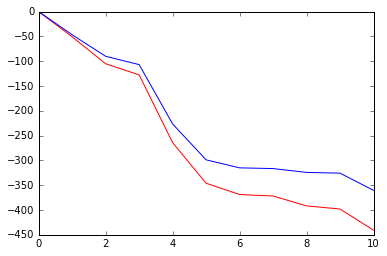

In [70]:
ds = netCDF4.Dataset(os.path.join(root, 'aeolis_year_nothing.nc'), 'r')
data = ds.variables['zb'][...]

blown_mass = np.zeros(data.shape[0])
for i in range(0,data.shape[0]):
     blown_mass[i] = np.sum((data[i,:,:]-data[0,:,:]).flatten()[(data[i,:,:]-data[0,:,:]).flatten()<0])
        
plt.plot(blown_mass,'r')

######################################
ds = netCDF4.Dataset(os.path.join(root, 'aeolis_year_all_thick.nc'), 'r')
data = ds.variables['zb'][...]

blown_mass = np.zeros(data.shape[0])
for i in range(0,data.shape[0]):
     blown_mass[i] = np.sum((data[i,:,:]-data[0,:,:]).flatten()[(data[i,:,:]-data[0,:,:]).flatten()<0])
        
plt.plot(blown_mass,'b')

In [23]:
with netCDF4.Dataset(os.path.join(root, 'aeolis_year_all.nc'), 'r') as ds:
    t = ds.variables['time'][:] / 3600.
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    f = ds.variables['fractions'][:]

    nx = x.shape[1]
    ny = y.shape[0]
    data = ds.variables['mass'][...]
    gs = ds.groups['settings'].getncattr('grain_size') * 1e6
    d50 = np.asarray([np.average(gs, weights=ds.variables['mass'][0,j,i,0,:]) for j in range(ny) for i in range(nx)]).reshape((ny, nx))

    print gs
    print data[0,:,:,0,0].min()
    print data[0,:,:,0,0].max()

    print d50.min()

[  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.]
0.0303749
0.655514
260.576429638


(11L, 80L, 30L, 10L, 11L)
(11L,)
530.0
530.0
[  731.  1462.  2193.  2924.  3655.  4386.  5117.  5848.  6579.  7310.
  8041.]


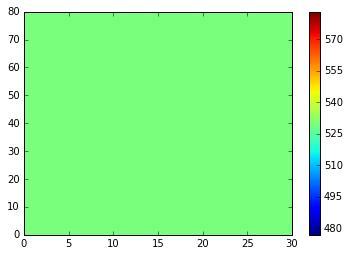

In [69]:
nl = -1
t1 = 0

with netCDF4.Dataset(os.path.join(root, 'aeolis_year_all_thick.nc'), 'r') as ds:
    t = ds.variables['time'][:] / 3600.
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    f = ds.variables['fractions'][:]

    nx = x.shape[1]
    ny = y.shape[0]
    data = ds.variables['mass'][...]
    print data.shape
    print f.shape
    mass_sum = np.sum(data, axis=4)
    p = plt.pcolor(mass_sum[t1,:,:,nl])
    colorbar(p)
    
    print mass_sum[t1,:,:,nl].min()
    print mass_sum[t1,:,:,nl].max()
    print t


In [ ]:
np.sum